# Flight Delay Prediction - Cleaning & Preprocessing

## Load Dataset from DOT

In [123]:
import pandas as pd

df = pd.read_csv('DelayedFlights.csv')

df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


## Get information about dataset

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [125]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [127]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [128]:
df.duplicated().sum()

2

In [129]:
duplicateRows = df[df.duplicated()]
print(duplicateRows)
#Not a real duplicate

        Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
294863  2008      2          28          4   1854.0        1807   1946.0   
294865  2008      2          28          4   2027.0        1942   2314.0   

        CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
294863        1902            F9        773  ...    8.0     13.0          0   
294865        2229            F9        780  ...   10.0     13.0          0   

        CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
294863                 N         0          44.0          0.0      0.0   
294865                 N         0           1.0          0.0     44.0   

        SecurityDelay  LateAircraftDelay  
294863            0.0                0.0  
294865            0.0                0.0  

[2 rows x 29 columns]


In [130]:
# missing data percentages by column
df.isnull().sum()/df.shape[0]*100

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [131]:
# get datatypes
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [132]:
# change na to 0 as no delay is the same as a delay of 0 minutes

df['CarrierDelay'] = df['CarrierDelay'].fillna(0)
df['WeatherDelay'] = df['WeatherDelay'].fillna(0)
df['NASDelay'] = df['NASDelay'].fillna(0)
df['SecurityDelay'] = df['SecurityDelay'].fillna(0)
df['LateAircraftDelay'] = df['LateAircraftDelay'].fillna(0)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [133]:
# check for nulls in columns with >0% nulls from previous cells
bool_series = pd.isnull(df['ArrTime']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1280,2008,1,3,4,922.0,915,NaN,1050,WN,1069,...,NaN,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1372,2008,1,3,4,2325.0,1900,NaN,2030,WN,2092,...,NaN,11.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1776,2008,1,4,5,1949.0,1905,NaN,1910,WN,1403,...,NaN,11.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1831,2008,1,4,5,737.0,705,NaN,825,WN,178,...,NaN,13.0,0,N,1,0.0,0.0,0.0,0.0,0.0
2244,2008,1,4,5,1849.0,1630,NaN,1755,WN,239,...,NaN,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934590,2008,12,7,7,1526.0,1444,NaN,1654,DL,1743,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
1935491,2008,12,10,3,1431.0,1422,NaN,1527,DL,1405,...,NaN,NaN,1,C,0,0.0,0.0,0.0,0.0,0.0
1935651,2008,12,10,3,1459.0,1447,NaN,1650,DL,1706,...,NaN,37.0,1,A,0,0.0,0.0,0.0,0.0,0.0
1935876,2008,12,11,4,1026.0,955,NaN,1219,DL,892,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0


In [134]:
df = df[df['ArrTime'].notna()]

In [135]:
bool_series = pd.isnull(df['ArrTime']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [136]:
bool_series = pd.isnull(df['TailNum']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
523748,2008,3,18,2,1716.0,1655,2036.0,1947,9E,3760,...,11.0,29.0,0,N,0,0.0,0.0,28.0,0.0,21.0
773772,2008,5,8,4,1545.0,1530,1711.0,1707,OH,5043,...,5.0,15.0,0,N,0,0.0,0.0,0.0,0.0,0.0
776480,2008,5,31,6,1720.0,1244,1920.0,1427,OH,5396,...,8.0,40.0,0,N,0,0.0,276.0,17.0,0.0,0.0


In [137]:
df = df[df['TailNum'].notna()]

In [138]:
bool_series = pd.isnull(df['TailNum']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [139]:
# check for nulls in columns with >0% nulls from previous cells
bool_series = pd.isnull(df['ActualElapsedTime']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1524962,2008,10,4,6,1540.0,1505,1908.0,1810,WN,1826,...,3.0,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1525257,2008,10,5,7,1831.0,1745,2155.0,1850,WN,1717,...,5.0,14.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1525408,2008,10,5,7,1346.0,1330,1706.0,1450,WN,957,...,4.0,6.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1525811,2008,10,5,7,1706.0,1645,2219.0,1925,WN,798,...,4.0,14.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1526316,2008,10,6,1,1938.0,1920,2358.0,2300,WN,1118,...,4.0,10.0,0,N,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934369,2008,12,7,7,1928.0,1645,29.0,2032,DL,133,...,6.0,45.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1934921,2008,12,9,2,1957.0,1905,22.0,2013,DL,792,...,35.0,25.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1935596,2008,12,10,3,714.0,640,1153.0,859,DL,1610,...,16.0,10.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1935716,2008,12,11,4,1355.0,1106,7.0,1950,DL,26,...,13.0,17.0,0,N,1,0.0,0.0,0.0,0.0,0.0


In [140]:
df = df[df['ActualElapsedTime'].notna()]

In [141]:
bool_series = pd.isnull(df['ArrTime']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [142]:
bool_series = pd.isnull(df['CRSElapsedTime']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [143]:
bool_series = pd.isnull(df['AirTime']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [144]:
bool_series = pd.isnull(df['ArrDelay']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [145]:
bool_series = pd.isnull(df['TaxiIn']) 
    
df[bool_series] 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [146]:
bool_series = pd.isnull(df['TaxiOut']) 
    
df[bool_series] 



,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [147]:
# check that all null values have been resolved
# missing data percentages by column
df.isnull().sum()/df.shape[0]*100

Year                 0.0
Month                0.0
DayofMonth           0.0
DayOfWeek            0.0
DepTime              0.0
CRSDepTime           0.0
ArrTime              0.0
CRSArrTime           0.0
UniqueCarrier        0.0
FlightNum            0.0
TailNum              0.0
ActualElapsedTime    0.0
CRSElapsedTime       0.0
AirTime              0.0
ArrDelay             0.0
DepDelay             0.0
Origin               0.0
Dest                 0.0
Distance             0.0
TaxiIn               0.0
TaxiOut              0.0
Cancelled            0.0
CancellationCode     0.0
Diverted             0.0
CarrierDelay         0.0
WeatherDelay         0.0
NASDelay             0.0
SecurityDelay        0.0
LateAircraftDelay    0.0
dtype: float64

In [82]:
import numpy as np
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 

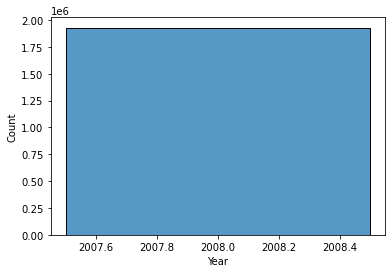

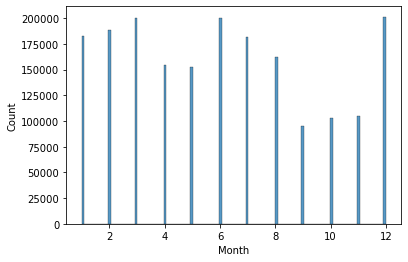

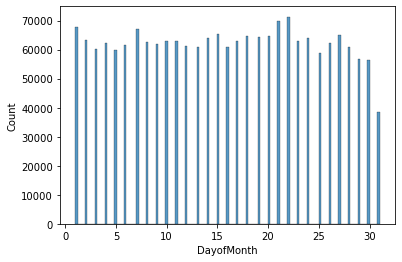

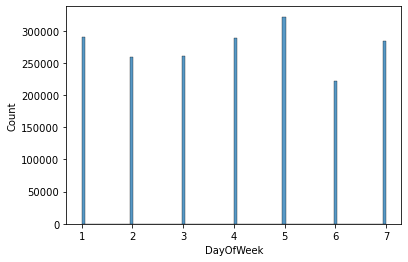

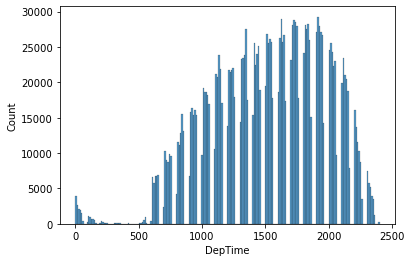

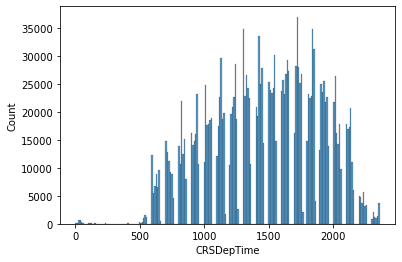

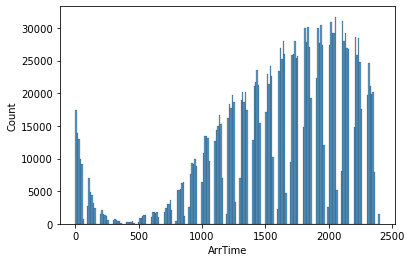

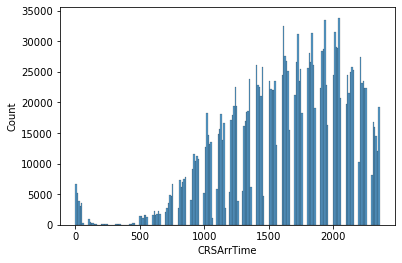

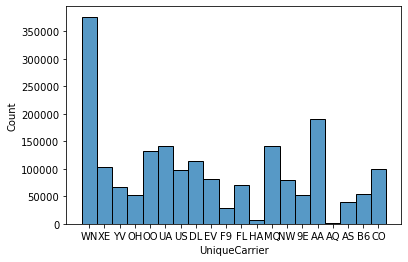

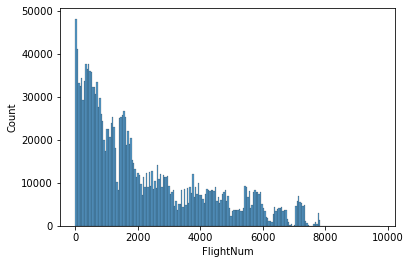

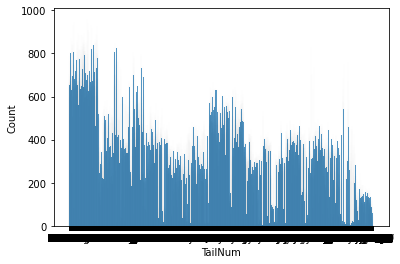

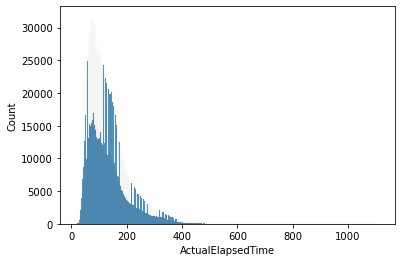

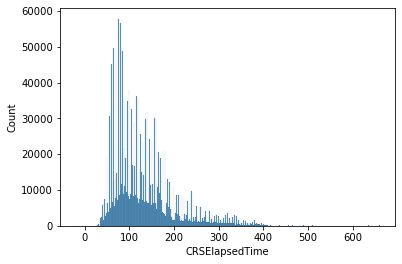

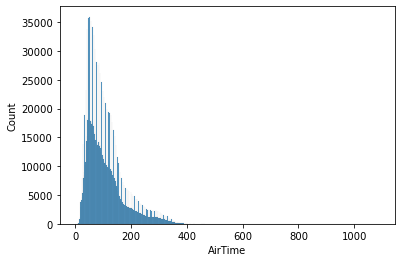

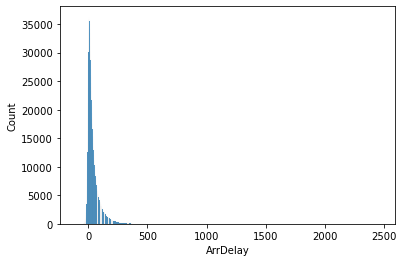

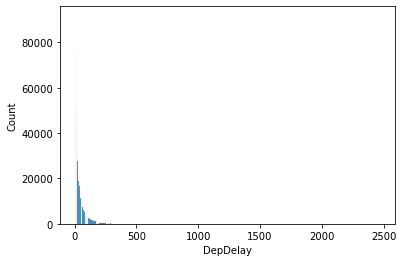

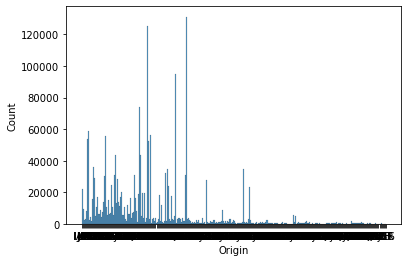

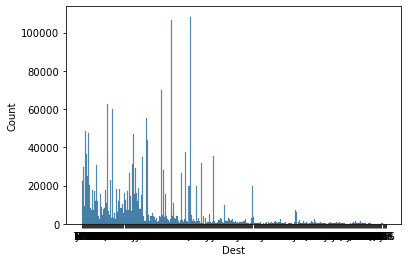

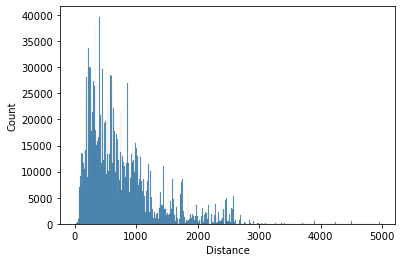

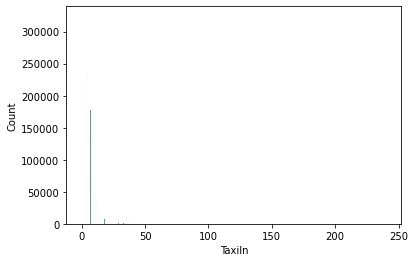

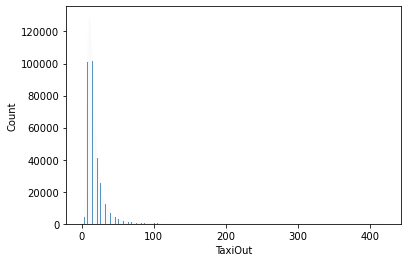

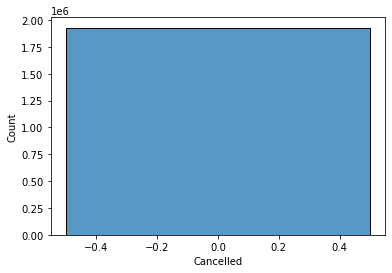

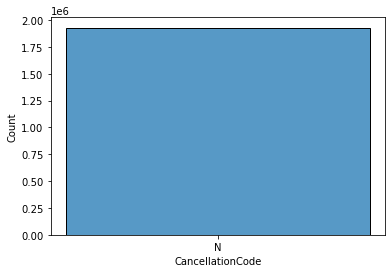

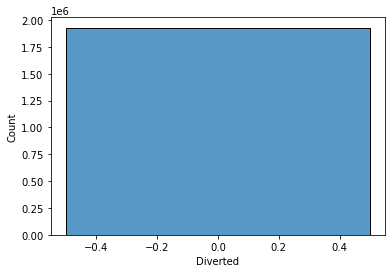

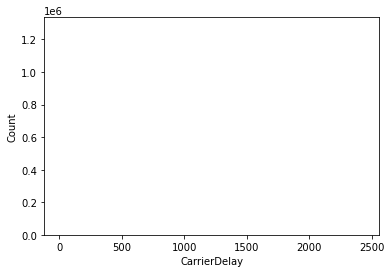

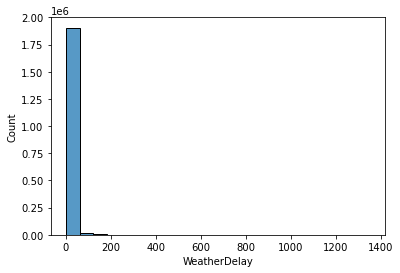

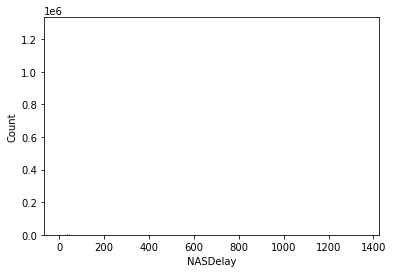

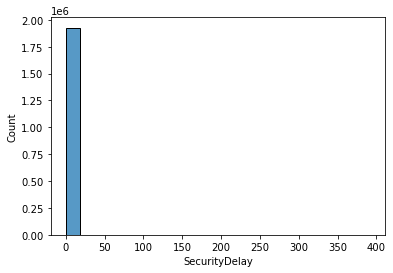

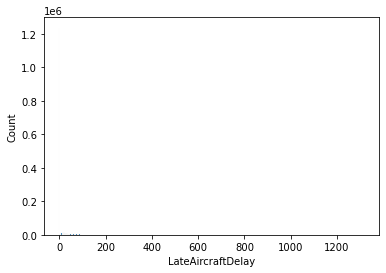

In [83]:
for col in df:
    sns.histplot(df[col])
    plt.show()

In [149]:
df.to_csv("flight_data.csv")